In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import scipy.special as spsp

%matplotlib inline

# unknown $\mu$ and unknown $\sigma$ ----------------------------------------


## hypothesis

$H_{0}$: mean $\mu = \mu_{0}$

$H_{1}$: mean $\mu \neq \mu_{0}$

significance level: $\alpha = 0.05$ (probability to reject $H_{0}$)

In [27]:
N = 20         # number of samples.
sg_true = 2.0  # true sigma
mu_true = 10.0 # true mean
mu_test = 9.6  # mu0
sg_test = 1.8  # sigma0

x = np.random.normal(loc=mu_true, scale=sg_true, size=N)
xm = x.mean()
S = ((x - xm)**2).sum()
V = S / (N - 1)
t = (xm - mu_test) / np.sqrt(V/N)
print('population mean = {:2.3f}'.format(xm))
print('t = {:2.3f}'.format(t))

population mean = 10.276
t = 1.453


Examine type-I error ($H_{1}$).

Assume $H_{0}$ is true and find the critical region.

Here we test if $\mu \neq \mu_{0}$.

$$\begin{align}
t \quad & = &\quad \frac{\bar{x} - \mu_{0}}{\sqrt{V/N}}\\
V \quad & = &\quad \frac{S}{N - 1}\\
S \quad & = &\quad \sum_{i}(x_{i} - \bar{x})^{2}\\
\phi \quad & = &\quad N - 1
\end{align}$$

Define $t(\phi, P)$ as the two-tail 100P% point of Student's t-distribution with $\phi$ degrees of freedom.

$$\begin{align}
Pr\big(|t_{0}| \ge t(\phi, P)\big) \quad & = &\quad  P
\end{align}$$

First, $t(\phi, \alpha)$ that yields the specified significance level.

$$\begin{align}
\alpha \quad & = &\quad Pr\big(|t_{0}| \ge t(\phi, P)\big)\\
\quad & = &\quad Pr\big(t_{0} \le -t(\phi, \alpha)\big) + Pr\big(t_{0} \ge t(\phi, \alpha)\big)\\
\end{align}$$


In [28]:
a = 0.05
ta2 = spst.t.ppf([1 - a/2, a/2], df=N-1)
print('dof       = {}'.format(N - 1))
print('t_(a/2)   = {:1.4f}'.format(ta2[0]))
print('t_(1-a/2) = {:1.4f}'.format(ta2[1]))
print('t         = {:2.3f}'.format(t))

dof       = 19
t_(a/2)   = 2.0930
t_(1-a/2) = -2.0930
t         = 1.453


Examine type-II error ($H_{1}$)

Assume $H_{1}$ is true and let us find the power.

Here we pick $\mu \neq \mu_{0}$ and assume an std $\sigma$. So-called noncentral parameter $\lambda$ will be important in the discussions below.

$$\begin{align}
\Delta \quad & = &\quad \frac{\mu - \mu_{0}}{\sigma}\\
\lambda \quad & = &\quad \sqrt{N}\Delta
\end{align}$$

The intension of this quantity is clear, however, how to pick this $\sigma$ remains to be discussed. For now, let us suppose we have picked a $\sigma$. THe power is 

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(|t_{0}| \ge t(\phi, P)\big)\\
\quad & = &\quad Pr\big(t_{0} \le -t(\phi, \alpha)\big) + Pr\big(t_{0} \ge t(\phi, \alpha)\big)\\
\end{align}$$

Using an approximation, we can convert this problem into dealing with the standard normal distributin instead. Namely,

$$\begin{align}
Pr\big(t' \le w \big) \quad & \approx &\quad Pr\bigg(u \le \frac{w(1 - 1/(4\phi)) - \lambda}{\sqrt{1 + w^{2}/(2\phi)}} \bigg)\\
(t: student's t distribution) \quad &  &\quad (u: standard\, normal\, distribution)
\end{align}$$

Here, 

$$\begin{align}
u \quad & = &\quad \frac{\bar{x} - \mu}{\sqrt{\sigma^{2}/N}}\\
t_{0} \quad & = &\quad  t'(\phi, \lambda)
\end{align}$$

, where $t'(\phi, \lambda)$ is noncentral t distribution with dof $\phi$ and noncentral parameter $\lambda$.

$$\begin{align}
t_{0} \quad & = &\quad \frac{\bar{x} - \mu_{0}}{\sqrt{V/N}}
\quad & = &\quad \frac{\bar{x} - \mu}{\sqrt{V/N}} + \frac{\mu - \mu_{0}}{\sqrt{V/N}}
\quad & = &\quad \frac{\bar{x} - \mu}{\sqrt{V/N}} + \sqrt{N}\bigg(\frac{\mu - \mu_{0}}{\sqrt{V}}\bigg)
\quad & \Rightarrow &\quad t + \lambda
\end{align}$$

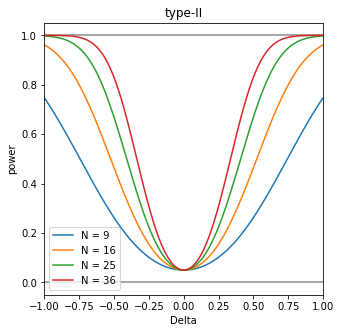

In [183]:
beta = 0.1
pwr = 1 - beta
deltas = np.arange(-1.0, 1.01, 0.01)
Ns = [x**2 for x in range(3, 7)]

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    ta2 = spst.t.ppf([1 - a/2, a/2], df=N-1)
    lmd = np.sqrt(N) * deltas
    power = spst.nct.cdf(ta2[1], nc=lmd, df=N-1)
    power += 1 - spst.nct.cdf(ta2[0], nc=lmd, df=N-1)
    plt.axhline(1, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((-1., 1.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

# non central t distribution

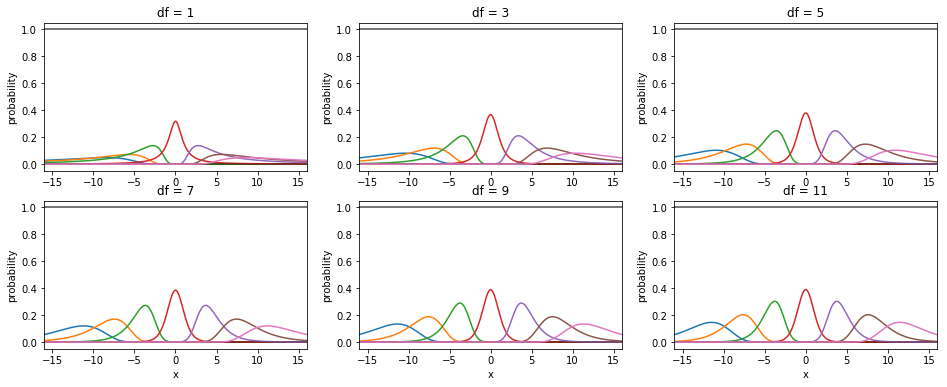

In [251]:
plt.rcParams['figure.figsize'] = (16.0, 6.0)
x = np.arange(-16.0, 16.01, 0.01)
lmds = np.arange(-12.0, 16.0, 4.0)
dfs = np.arange(1, 13, 2)
for j, df in enumerate(dfs):
    for i, lmd in enumerate(lmds):
        plt.subplot(2, 3, j+1)
        y = spst.nct.pdf(x=x, nc=lmd, df=df)
        plt.axhline(1, lw=0.2, color=(0., 0., 0.))
        plt.axhline(0, lw=0.2, color=(0., 0., 0.))
        plt.plot(x, y, '-', label='lmd = {:1.1f}'.format(lmd))
        plt.xlim((-16., 16.))
        plt.ylim((-0.05, 1.05))
        #plt.legend(loc='best')
        if j >= 3:
            plt.xlabel('x')
        plt.ylabel('probability')
        plt.title('df = {:d}'.format(df))

## Design of sample size according to a specified power

The power is expressed as

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(t_{0} \le -t(\phi, \alpha)\big) + Pr\big(t_{0} \ge t(\phi, \alpha)\big)\\
\end{align}$$

, where

$$\begin{align}
t_{0} \quad & = &\quad \frac{\bar{x} - \mu_{0}}{\sqrt{V/N}}
\quad & = &\quad \frac{\bar{x} - \mu}{\sqrt{V/N}} + \frac{\mu - \mu_{0}}{\sqrt{V/N}}
\quad & \Rightarrow &\quad t + \lambda
\end{align}$$

For the specified power $1-\beta$ and $\lambda = \sqrt{N}\Delta$, the required sample size is 

$$\begin{align}
N \quad & \approx &\quad \bigg(\frac{z_{\alpha/2} - z_{1-\beta}}{\Delta}\bigg)^{2} + \frac{z_{\alpha/2}^{2}}{2}
\end{align}$$


In [217]:
dd = 0.2 # delta
a = 0.05 # significance level
b = 0.1  # prob. type-II error.

za = spst.norm.ppf(1 - a/2)
zb = spst.norm.ppf(b)
Napp = ((za - zb)/dd)**2 + 0.5*za**2 # Fisher

# numerical search
N = 1000
dfs = np.arange(1, N + 1)
lmd = np.sqrt(dfs + 1) * dd  
tasr = spst.t.ppf(1 - a/2, df=dfs)
pwrs = 1 - spst.nct.cdf(tasr, nc=lmd, df=dfs)
tasl = spst.t.ppf(a/2, df=dfs)
pwrs += spst.nct.cdf(tasl, nc=lmd, df=dfs)
pwr = 1 - b
N_nm = find_sample_size(pwr, pwrs, dfs)
print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
print('N = {:2d} (Napp = {:2.3f})\n'.format(N_nm, Napp))

power = 0.90, delta = 0.200
N = 265 (Napp = 264.606)



In [218]:
def find_sample_size(pwr, pwrs, dfs):
    idx1 = 0
    idx4 = N - 1
    idx2 = idx1 + (idx4 - idx1) // 3
    idx3 = idx4 - (idx4 - idx1) // 3
    while True:
        if pwrs[idx1] == pwr:
            idx = idx1
            break
        elif pwrs[idx2] == pwr:
            idx = idx2
            break
        elif pwrs[idx3] == pwr:
            idx = idx3
            break
        elif pwrs[idx4] == pwr:
            idx = idx4
            break

        if pwrs[idx2] > pwr and pwrs[idx3] > pwr:
            idx2 = idx1
            idx4 = idx3
            idx3 = idx4 - (idx4 - idx1) // 3
        elif pwrs[idx2] < pwr and pwrs[idx3] < pwr:
            idx3 = idx4
            idx1 = idx2
            idx2 = idx1 + (idx4 - idx1) // 3
        else:
            if idx4 <= idx1 + 3:
                idx1 = idx2
                idx4 = idx3
                idx2 = idx1 + 1
                idx3 = idx4 - 1
            else:
                idx1 = idx2
                idx4 = idx3
                idx2 = idx1 + (idx4 - idx1) // 3
                idx3 = idx4 - (idx4 - idx1) // 3
        #print('{:6d}, {:6d}, {:6d}, {:6d}'.format(dfs[idx1],dfs[idx2],dfs[idx3],dfs[idx4]))
        #print('{:1.4f}, {:1.4f}, {:1.4f}, {:1.4f}\n'.format(pwrs[idx1],pwrs[idx2],pwrs[idx3],pwrs[idx4]))
        
        if idx2 + 1 >= idx3:
            if pwrs[idx1] < pwr and pwrs[idx2] >= pwr:
                idx = idx2
                break
            elif pwrs[idx2] < pwr and pwrs[idx3] >= pwr:
                idx = idx3
                break
            elif pwrs[idx3] < pwr and pwrs[idx4] >= pwr:
                idx = idx4
                break
    return dfs[idx] + 1 # N - 1 

## hypothesis

$H_{0}$: mean $\mu = \mu_{0}$

$H_{1}$: mean $\mu > \mu_{0}$

significance level: $\alpha = 0.05$ (probability to reject $H_{0}$)

In [30]:
N = 20         # number of samples.
sg_true = 2.0  # true sigma
mu_true = 10.0 # true mean
mu_test = 9.6  # mu0
sg_test = 1.8  # sigma0

x = np.random.normal(loc=mu_true, scale=sg_true, size=N)
xm = x.mean()
S = ((x - xm)**2).sum()
V = S / (N - 1)
t = (xm - mu_test) / np.sqrt(V/N)
print('population mean = {:2.3f}'.format(xm))
print('t = {:2.3f}'.format(t))

population mean = 9.565
t = -0.064


Examine type-I error ($H_{1}$).

Assume $H_{0}$ is true and find the critical region.

Here we test if $\mu > \mu_{0}$.

$$\begin{align}
\alpha \quad & = &\quad Pr\big(t_{0} \ge t(\phi, 2\alpha)\big)\\
\end{align}$$

In [44]:
a = 0.05
ta = spst.t.ppf([1 - a], df=N-1)
print('dof       = {}'.format(N - 1))
print('t_(1-a)   = {:1.4f}'.format(ta[0]))
print('t         = {:2.3f}'.format(t))

dof       = 35
t_(1-a)   = 1.6896
t         = -3.413


Examine type-II error ($H_{1}$)

Assume $H_{1}$ is true and let us find the power.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(t_{0} \ge t(\phi, 2\alpha)\big)\\
\end{align}$$

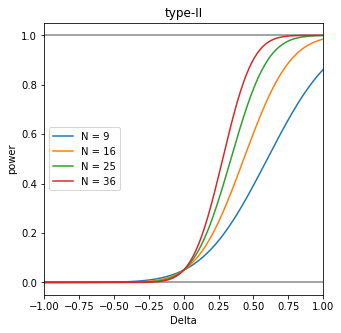

In [184]:
beta = 0.1
pwr = 1 - beta
deltas = np.arange(-1.0, 1.01, 0.01)
Ns = [x**2 for x in range(3, 7)]

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    t1a = spst.t.ppf([1 - a], df=N-1)
    lmd = np.sqrt(N) * deltas
    power = 1 - spst.nct.cdf(t1a[0], nc=lmd, df=N-1)
    plt.axhline(1, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((-1., 1.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

### Design of sample size according to a specified power

The power is expressed as

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(t_{0} \ge t(\phi, 2\alpha)\big)\\
\end{align}$$

For the specified power $1-\beta$ and $\lambda = \sqrt{N}\Delta$, the required sample size is 

$$\begin{align}
N \quad & \approx &\quad \bigg(\frac{z_{\alpha} - z_{1-\beta}}{\Delta}\bigg)^{2} + \frac{z_{\alpha}^{2}}{2}
\end{align}$$


In [219]:
dd = 0.2 # delta
a = 0.05 # significance level
b = 0.05  # prob. type-II error.

za = spst.norm.ppf(1 - a)
zb = spst.norm.ppf(b)
Napp = ((za - zb)/dd)**2 + 0.5*za**2 # Fisher

# numerical search
N = 1000
dfs = np.arange(1, N + 1)
lmd = np.sqrt(dfs + 1)*dd
tas = spst.t.ppf(1 - a, df=dfs)
pwrs = 1 - spst.nct.cdf(tas, nc=lmd, df=dfs)
pwr = 1 - b
N_nm = find_sample_size(pwr, pwrs, dfs) 
print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
print('N = {:2d} (Napp = {:2.3f})\n'.format(N_nm, Napp))

power = 0.95, delta = 0.200
N = 272 (Napp = 271.907)



## hypothesis

$H_{0}$: mean $\mu = \mu_{0}$

$H_{1}$: mean $\mu < \mu_{0}$

significance level: $\alpha = 0.05$ (probability to reject $H_{0}$)

In [46]:
N = 20         # number of samples.
sg_true = 2.0  # true sigma
mu_true = 10.0 # true mean
mu_test = 10.4  # mu0
sg_test = 1.8  # sigma0

x = np.random.normal(loc=mu_true, scale=sg_true, size=N)
xm = x.mean()
S = ((x - xm)**2).sum()
V = S / (N - 1)
t = (xm - mu_test) / np.sqrt(V/N)
print('population mean = {:2.3f}'.format(xm))
print('t = {:2.3f}'.format(t))

population mean = 9.493
t = -2.056


Examine type-I error ($H_{1}$).

Assume $H_{0}$ is true and find the critical region.

Here we test if $\mu < \mu_{0}$.

$$\begin{align}
\alpha \quad & = &\quad Pr\big(t_{0} \le t(\phi, 2\alpha)\big)\\
\end{align}$$

In [47]:
a = 0.05
ta = spst.t.ppf([a], df=N-1)
print('dof     = {}'.format(N - 1))
print('t_(a)   = {:1.4f}'.format(ta[0]))
print('t       = {:2.3f}'.format(t))

dof     = 19
t_(a)   = -1.7291
t       = -2.056


Examine type-II error ($H_{1}$)

Assume $H_{1}$ is true and let us find the power.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(t_{0} \le t(\phi, 1 - 2\alpha)\big)\\
\end{align}$$

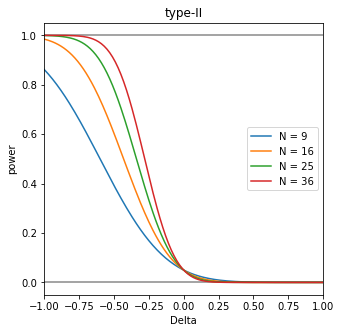

In [185]:
beta = 0.1
pwr = 1 - beta
deltas = np.arange(-1.0, 1.01, 0.01)
Ns = [x**2 for x in range(3, 7)]

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    ta = spst.t.ppf([a], df=N-1)
    lmd = np.sqrt(N) * deltas
    power = spst.nct.cdf(ta[0], nc=lmd, df=N-1)
    plt.axhline(1, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((-1., 1.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

### Design of sample size according to a specified power

The power is expressed as

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(t_{0} \le t(\phi, 1-2\alpha)\big)\\
\end{align}$$

For the specified power $1-\beta$ and $\lambda = \sqrt{N}\Delta$, the required sample size is 

$$\begin{align}
N \quad & \approx &\quad \bigg(\frac{z_{\alpha} - z_{1-\beta}}{\Delta}\bigg)^{2} + \frac{z_{\alpha}^{2}}{2}
\end{align}$$



In [220]:
dd = 0.8 # delta
a = 0.05 # significance level
b = 0.10  # prob. type-II error.

za = spst.norm.ppf(a)
zb = spst.norm.ppf(1 - b)
Napp = ((za - zb)/dd)**2 + 0.5*za**2 # Fisher

# numerical search
N = 1000
dfs = np.arange(1, N + 1)
tas = spst.t.ppf(a, df=dfs)
lmd = -np.sqrt(dfs + 1)*dd
pwrs = spst.nct.cdf(tas, nc=lmd, df=dfs)
pwr = 1 - b
N_nm = find_sample_size(pwr, pwrs, dfs)
print('power = {:1.2f}, delta = {:1.3f}'.format(pwr, dd))
print('N = {:2d} (Napp = {:2.3f})\n'.format(N_nm, Napp))

power = 0.90, delta = 0.800
N = 15 (Napp = 14.734)



## exercises 4.1 - 4.10

In [187]:
x = np.array([6.2, 4.8, 7.3, 5.5, 6.5, 4.9, 6.8, 7.9, 6.6, 7.3])

N = x.shape[0]
xm = x.mean()
S = ((x - xm)**2).sum()
V = S/(N -1)
print('population mean = {:2.3f}'.format(xm))
print('S               = {:2.3f}'.format(S))

a = 0.05
mu0 = 5.0
t = (xm - mu0)/np.sqrt(V/N)
ta2 = spst.t.ppf([1 - a/2, a/2], df=N-1)

print('\ndof       =  {}'.format(N - 1))
print('t         =  {:1.4f}'.format(t))
print('t_(a/2)   =  {:1.4f}'.format(ta2[0]))
print('t_(1-a/2) = {:1.4f}'.format(ta2[1]))

population mean = 6.380
S               = 9.736

dof       =  9
t         =  4.1958
t_(a/2)   =  2.2622
t_(1-a/2) = -2.2622


In [188]:
x = np.array([10.8, 11.2, 9.7, 9.9, 12.0, 9.6, 10.5, 10.7, 10.1])

N = x.shape[0]
xm = x.mean()
S = ((x - xm)**2).sum()
V = S/(N -1)
print('population mean = {:2.3f}'.format(xm))
print('S               = {:2.3f}'.format(S))

a = 0.05
mu0 = 10.0
t = (xm - mu0)/np.sqrt(V/N)
ta = spst.t.ppf([1 - a], df=N-1)

print('\ndof   =  {}'.format(N - 1))
print('t     =  {:1.4f}'.format(t))
print('t_a   =  {:1.4f}'.format(ta[0]))

population mean = 10.500
S               = 4.840

dof   =  8
t     =  1.9285
t_a   =  1.8595


In [189]:
x = np.array([21, 19, 16, 19, 22, 18, 20, 21])

N = x.shape[0]
xm = x.mean()
S = ((x - xm)**2).sum()
V = S/(N -1)
print('population mean = {:2.3f}'.format(xm))
print('S               = {:2.3f}'.format(S))

a = 0.05
mu0 = 20.0
t = (xm - mu0)/np.sqrt(V/N)
ta = spst.t.ppf([a], df=N-1)

print('\ndof   =  {}'.format(N - 1))
print('t     =  {:1.4f}'.format(t))
print('t_a   =  {:1.4f}'.format(ta[0]))

population mean = 19.500
S               = 26.000

dof   =  7
t     =  -0.7338
t_a   =  -1.8946


In [190]:
Ns = [10, 20]
deltas = [0.5, 0.5]
mu0 = 5.0
a = 0.05

for delta, N in zip(deltas, Ns):
    phi = N - 1
    ta2 = spst.t.ppf([1 - a/2, a/2], df=phi)
    lmd = np.sqrt(N) * delta
    pwr = 1 - spst.nct.cdf(x=ta2[0], nc=lmd, df=phi)
    pwr += spst.nct.cdf(x=ta2[1], nc=lmd, df=phi)
    print('N = {:2d}, power = {:1.5f}'.format(N, pwr))

N = 10, power = 0.29318
N = 20, power = 0.56450


In [191]:
Ns = [9, 9]
deltas = [1.0, 1.5]
mu0 = 10.0
a = 0.05

for delta, N in zip(deltas, Ns):
    phi = N - 1
    ta  = spst.t.ppf([1 - a], df=phi)
    lmd = np.sqrt(N) * delta
    pwr = 1 - spst.nct.cdf(x=ta[0], nc=lmd, df=phi)
    print('N = {:2d}, power = {:1.5f}'.format(N, pwr))

N =  9, power = 0.86181
N =  9, power = 0.99260


In [192]:
Ns = [8, 16]
deltas = [-1.0, -1.0]
mu0 = 10.0
a = 0.05

for delta, N in zip(deltas, Ns):
    phi = N - 1
    ta  = spst.t.ppf([a], df=phi)
    lmd = np.sqrt(N) * delta
    pwr = spst.nct.cdf(x=ta[0], nc=lmd, df=phi)
    print('N = {:2d}, power = {:1.5f}'.format(N, pwr))

N =  8, power = 0.81502
N = 16, power = 0.98485


In [224]:
deltas = [0.8] # delta
a = 0.05 # significance level
powers = [0.9, 0.95] # prob. type-II error.

for pwr in powers:
    for dd in deltas:
        za = spst.norm.ppf(1 - a/2)
        zb = spst.norm.ppf(1 - pwr)
        Napp = ((za - zb)/dd)**2 + 0.5*za**2 # Fisher

        # numerical search
        N = 1000
        dfs = np.arange(1, N + 1)
        lmd = np.sqrt(dfs + 1) * dd  
        tasr = spst.t.ppf(1 - a/2, df=dfs)
        pwrs = 1 - spst.nct.cdf(tasr, nc=lmd, df=dfs)
        tasl = spst.t.ppf(a/2, df=dfs)
        pwrs += spst.nct.cdf(tasl, nc=lmd, df=dfs)
        N_nm = find_sample_size(pwr, pwrs, dfs)

        print('power = {:1.3f}\ndelta = {:1.3f}'.format(pwr, dd))
        print('N     = {:2d}\nN_app = {:2.3f}\n'.format(N_nm, Napp))

power = 0.900
delta = 0.800
N     = 19
N_app = 18.339

power = 0.950
delta = 0.800
N     = 23
N_app = 22.225



In [222]:
deltas = [1.0, 0.5] # delta
a = 0.05 # significance level
powers = [0.9] # prob. type-II error.

for pwr in powers:
    for dd in deltas:
        za = spst.norm.ppf(1 - a)
        zb = spst.norm.ppf(1 - pwr)
        Napp = ((za - zb)/dd)**2 + 0.5*za**2 # Fisher

        # numerical search
        N = 1000
        dfs = np.arange(1, N + 1)
        lmd = np.sqrt(dfs + 1) * dd  
        tasr = spst.t.ppf(1 - a, df=dfs)
        pwrs = 1 - spst.nct.cdf(tasr, nc=lmd, df=dfs)
        N_nm = find_sample_size(pwr, pwrs, dfs)

        print('power = {:1.3f}\ndelta = {:1.3f}'.format(pwr, dd))
        print('N     = {:2d}\nN_app = {:2.3f}\n'.format(N_nm, Napp))

power = 0.900
delta = 1.000
N     = 11
N_app = 9.917

power = 0.900
delta = 0.500
N     = 36
N_app = 35.608



In [223]:
deltas = [-1.2, -1.5] # delta
a = 0.05 # significance level
powers = [0.9, 0.95] # prob. type-II error.

for pwr, dd in zip(powers, deltas):
        za = spst.norm.ppf(a)
        zb = spst.norm.ppf(pwr)
        Napp = ((za - zb)/dd)**2 + 0.5*za**2 # Fisher

        # numerical search
        N = 1000
        dfs = np.arange(1, N + 1)
        lmd = np.sqrt(dfs + 1) * dd  
        tasl = spst.t.ppf(a, df=dfs)
        pwrs = spst.nct.cdf(tasl, nc=lmd, df=dfs)
        N_nm = find_sample_size(pwr, pwrs, dfs)

        print('power = {:1.3f}\ndelta = {:1.3f}'.format(pwr, dd))
        print('N     = {:2d}\nN_app = {:2.3f}\n'.format(N_nm, Napp))

power = 0.900
delta = -1.200
N     =  8
N_app = 7.300

power = 0.950
delta = -1.500
N     =  7
N_app = 6.163

